## **ML :** Weather AUS

#### _Rain in Australia_

🟠 `on work`

---

1. **Preprocessing**
    * Extraction et préparation
    * Nettoyage et encodage
    * Proto-modélisation
    * Traitement du contenu
    * Feature Selection
    * Feature Engineering
    * Feature Scaling
2. **Modeling**
    * Fonction d’évaluation
    * Entrainements multiples modèles
    * Optimisation
    * Analyse des erreurs
    * Courbe d'aprentissage
    * Décision

**Built-in**

**Librairies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**ML Objects**

In [38]:
# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
# - -
# Evaluation, tuning, etc.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
# - -
# Preprocessing
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import MinMaxScaler
# - -
# Imputer
from sklearn.impute import KNNImputer
# - -
# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import average_precision_score
# from sklearn.metrics import precision_score
# - - 
# Tools
# from sklearn.compose import make_column_transformer
# from sklearn.tree import plot_tree
# from sklearn.utils import resample
from sklearn.ensemble import IsolationForest

**User Code**

In [4]:
# Reserved keywords for objects
df = pd.DataFrame
cm = confusion_matrix
cm_d = ConfusionMatrixDisplay
cr = classification_report
# tf = make_column_transformer
tf_fit = None

In [5]:
def extract_x_y(dataframe:pd.DataFrame, target:str|list[str]) -> tuple :
    """Extract Features and Target from dataset

    Args:
        dataframe (pd.DataFrame): Dataframe to extract columns from
        target (str | list[str]): Target name

    Returns:
        tuple: Feature as X, and Label as y
    """

    y = dataframe[target] 
    X = dataframe.drop(columns=target)

    print(y.unique())
    print(X.columns.to_list())

    return X, y

In [6]:
def save_cm(cm:list, name:str) -> None :
    """Save a Confusion Matrix as CSV file in `./_outputs/` subdirectory

    Args:
        cm (list): Confusion Matrix built with `sklearn.metrics.confusion_matrix`
        name (str): A lowercase spaceless text for file name
    """
        
    df = pd.DataFrame({
        'Predict. Yes': [cm[0,0], cm[1,0]],
        'Predict. No': [cm[1,0], cm[1,1]]
    }, index=['True Yes', 'True No'])
    
    df.to_csv(f'./_outputs/cm_{name}.csv')

In [7]:
def one_hot_encoder(X:pd.DataFrame, features:list[str]) -> pd.DataFrame :
    """Encode variables with 'OneHotEncoder' :: /!\ 1 only

    Args:
        X (pd.DataFrame): _description_
        features (list[str]): _description_

    Returns:
        pd.DataFrame: _description_
    """
    
    ohe = OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse=False, dtype=np.int8)
    X_enc = pd.DataFrame()
    
    X_enc[features] = pd.DataFrame(ohe.fit_transform(X[features]), columns=features)

    # One-hot encoding removed index => put it back
    X_enc.index = X.index
    
    X.drop(features, axis=1, inplace=True)

    X_ohe = pd.concat([X, X_enc], axis=1)
    
    return X_ohe

In [8]:
def prediction_quick_view(predictions:pd.Series, labels:pd.Series, title:str = '') -> pd.DataFrame :
    """Create a tiny DataFrame with predictions overview

    Args:
        predictions (pd.Series): Data serie of predictions
        labels (pd.Series): Data serie of true labels
        title (str, optional): Title of preditions, if it's train or test. Defaults to ''.

    Returns:
        pd.DataFrame: DataFrame synthesis
    """

    predict_t = f"Prédictions {title}"
    response_t = f"Réponses {title}"

    return pd.DataFrame({
        predict_t: predictions,
        response_t: labels,
        'Egalité': (predictions == labels)
    })

**Notebook Setup**

In [29]:
# Colour codes
mean_c = '#FFFFFF'
median_c = '#c2e800'
default_c = '#336699'
palette_c = [
    '#b8e600', # Sunny
    '#00bfff' # Rainy
]

# Pandas
pd.options.display.max_rows = 30
pd.options.display.min_rows = 6

# Matplotlib
plt.style.use('dark_background')

plt.rcParams['figure.facecolor'] = '#242428'
plt.rcParams['axes.facecolor'] = '#242428'
plt.rcParams['axes.titleweight'] = 'bold'

**Weather AUS**

[Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

In [10]:
weather_file_path = './_datasets/weather_data_resampled.csv'
weather_data = pd.read_csv(weather_file_path)

weather_data

,Evaporation,Sunshine,WindGustSpeed,Humidity3pm,Pressure,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,7.6,7.7,46.0,50.0,1019.35,7.0,22.2,No,No
1,4.6,4.1,NaN,58.0,1022.90,7.0,18.8,No,No
2,1.4,0.1,39.0,67.0,1027.35,8.0,11.7,Yes,No
...,...,...,...,...,...,...,...,...,...
62399,NaN,NaN,30.0,65.0,1016.10,8.0,21.2,Yes,Yes
62400,NaN,NaN,35.0,59.0,1016.40,8.0,26.0,Yes,Yes
62401,NaN,NaN,46.0,56.0,1017.90,5.0,26.9,Yes,Yes


Valeurs nulles

In [11]:
pd.DataFrame({
    'Types': weather_data.dtypes,
    'Qté de Nulles' : weather_data.isnull().sum()
})

,Types,Qté de Nulles
Evaporation,float64,26612
Sunshine,float64,29514
WindGustSpeed,float64,4257
Humidity3pm,float64,1622
Pressure,float64,5999
Cloud3pm,float64,23939
Temp3pm,float64,1204
RainToday,object,0
RainTomorrow,object,0


---

### **1.** Preprocessing

##### **1.1** - Extraction et préparation

In [12]:
X, y = extract_x_y(weather_data, 'RainTomorrow')

['No' 'Yes']
['Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure', 'Cloud3pm', 'Temp3pm', 'RainToday']


In [13]:
y = y.astype('category')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=5)

In [15]:
pd.concat([
    pd.DataFrame({
    'Label Entrainement': y_train.describe(),
    'Label Test': y_test.describe()
    }),
    pd.Series([
        (y_train.describe()[3] / y_train.count()) * 100,
        (y_test.describe()[3] / y_test.count()) * 100
    ], name='percent of no', index=['Label Entrainement', 'Label Test']).to_frame().T
])

,Label Entrainement,Label Test
count,46801,15601
unique,2,2
top,No,Yes
freq,23448,7848
percent of no,50.101494,50.304468


##### **1.2** - Nettoyage et encodage

Encodage des variables nominales

In [16]:
categoricals = ['RainToday']

In [17]:
X_train = one_hot_encoder(X_train, categoricals)

X_train['RainToday'].unique()

array([1, 0], dtype=int8)

In [18]:
X_test = one_hot_encoder(X_test, categoricals)

X_test['RainToday'].unique()

array([0, 1], dtype=int8)

Nettoyage des valeurs

In [19]:
knn_imputer = KNNImputer(n_neighbors=5, copy=False)
X_train = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46801 entries, 0 to 46800
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Evaporation    46801 non-null  float64
 1   Sunshine       46801 non-null  float64
 2   WindGustSpeed  46801 non-null  float64
 3   Humidity3pm    46801 non-null  float64
 4   Pressure       46801 non-null  float64
 5   Cloud3pm       46801 non-null  float64
 6   Temp3pm        46801 non-null  float64
 7   RainToday      46801 non-null  float64
dtypes: float64(8)
memory usage: 2.9 MB


In [20]:
X_test = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15601 entries, 0 to 15600
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Evaporation    15601 non-null  float64
 1   Sunshine       15601 non-null  float64
 2   WindGustSpeed  15601 non-null  float64
 3   Humidity3pm    15601 non-null  float64
 4   Pressure       15601 non-null  float64
 5   Cloud3pm       15601 non-null  float64
 6   Temp3pm        15601 non-null  float64
 7   RainToday      15601 non-null  float64
dtypes: float64(8)
memory usage: 975.2 KB


In [21]:
pd.DataFrame({
    'Entrainement : Types': X_train.dtypes,
    'Entrainement : Qté de Nulles' : X_train.isnull().sum(),
    'Test : Types': X_test.dtypes,
    'Test : Qté de Nulles' : X_test.isnull().sum()
})

,Entrainement : Types,Entrainement : Qté de Nulles,Test : Types,Test : Qté de Nulles
Evaporation,float64,0,float64,0
Sunshine,float64,0,float64,0
WindGustSpeed,float64,0,float64,0
Humidity3pm,float64,0,float64,0
Pressure,float64,0,float64,0
Cloud3pm,float64,0,float64,0
Temp3pm,float64,0,float64,0
RainToday,float64,0,float64,0


Ajustement des variables ordinales `--force`

In [22]:
# @_@ !!!!
X_train['Cloud3pm'].unique()

array([6.4, 8. , 6. , 3.2, 0. , 2. , 1. , 7.2, 5.2, 2.2, 7. , 3.6, 4.2,
       5. , 4. , 2.8, 6.6, 6.2, 3. , 4.8, 4.6, 1.6, 5.8, 1.4, 3.8, 5.4,
       6.8, 5.6, 2.4, 7.4, 7.6, 4.4, 3.4, 2.6, 1.8, 1.2, 7.8, 0.6, 0.4,
       0.8, 0.2, 9. ])

In [23]:
X_train['Cloud3pm'] = X_train['Cloud3pm'].round()

Ajustement de types

In [24]:
X_train['Cloud3pm'] = X_train['Cloud3pm'].astype(np.int8)
X_train['RainToday'] = X_train['RainToday'].astype(np.int8)
X_test['RainToday'] = X_test['RainToday'].astype(np.int8)

display(
    X_train['Cloud3pm'].dtype,
    X_train['RainToday'].dtype,
    X_test['RainToday'].dtype
)

dtype('int8')

dtype('int8')

dtype('int8')

##### **1.2** - Proto-modélisation

Données d'entrainement `X_train`

In [25]:
proto_DT = DecisionTreeClassifier()
proto_DT.fit(X_train, y_train)

proto_train_predictions = proto_DT.predict(X_train)

In [26]:
df = prediction_quick_view(proto_train_predictions, y_train, 'Train')

df.loc[df['Egalité'] == False]

,Prédictions Train,Réponses Train,Egalité
34678,No,Yes,False
26336,Yes,No,False
2869,Yes,No,False
...,...,...,...
8888,Yes,No,False
34538,No,Yes,False
34630,No,Yes,False


In [27]:
y_train.value_counts()

No     23448
Yes    23353
Name: RainTomorrow, dtype: int64

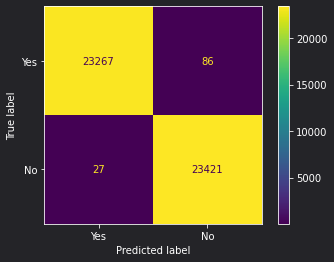

In [30]:
# (!) - 86 bad predictions for 'RainTomorrow' = `Yes` and 27 for 'RainTomorrow' = `No` 
cm = confusion_matrix(y_train, proto_train_predictions, labels=['Yes', 'No'])

save_cm(cm, 'train_proto')

cm_d = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Yes', 'No'])
cm_d.plot()
plt.show()

In [31]:
proto_DT.score(X_train, y_train)

0.9975855216768873

In [32]:
cr = classification_report(y_train, proto_train_predictions)

print(cr)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00     23448
         Yes       1.00      1.00      1.00     23353

    accuracy                           1.00     46801
   macro avg       1.00      1.00      1.00     46801
weighted avg       1.00      1.00      1.00     46801



Données de test `X_test`

In [33]:
proto_test_predictions = proto_DT.predict(X_test)

In [34]:
df = prediction_quick_view(proto_test_predictions, y_test, 'Test')

df.loc[df['Egalité'] == False]

,Prédictions Test,Réponses Test,Egalité
1466,Yes,No,False
56675,No,Yes,False
23075,Yes,No,False
...,...,...,...
42790,No,Yes,False
59888,No,Yes,False
15033,Yes,No,False


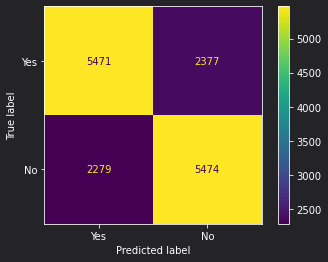

In [35]:
# (!) - xD !! 
cm = confusion_matrix(y_test, proto_test_predictions, labels=['Yes', 'No'])

save_cm(cm, 'test_proto')

cm_d = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Yes', 'No'])
cm_d.plot()
plt.show()

In [36]:
proto_DT.score(X_test, y_test)

0.7015575924620217

In [37]:
# (!) - xD xD xD
cr = classification_report(y_test, proto_test_predictions)

print(cr)

              precision    recall  f1-score   support

          No       0.70      0.71      0.70      7753
         Yes       0.71      0.70      0.70      7848

    accuracy                           0.70     15601
   macro avg       0.70      0.70      0.70     15601
weighted avg       0.70      0.70      0.70     15601



##### **1.3** - Traitements du contenu

Valeurs aberrantes

In [ ]:
# (!) - Sample for outliers
# X_train_otlr = X_train.copy()

# isolator = IsolationForest()
# X_train_otlr['outlier'] = isolator.fit_predict(X_train_otlr)

# X_train_otlr.loc[X_train_otlr['outlier'] < 0]

##### **1.4** - Traitements Features

Features Selection

Features Engineering

Features Scaling

---

In [41]:
# (!) - Sample for Strat'KF
# cv_Strat_KF = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
# cvs_Strat_KF = cross_val_score(proto_DT, X_train, y_train, cv=cv_Strat_KF)

# proto_DT_Strat_KF = cvs_Strat_KF.mean()

In [ ]:
# (!) - Sample for results w/ Strat'KF
# display(
#     cvs_Strat_KF,
#     proto_DT_Strat_KF
# )

# proto_DT.score(X_train, y_train)

In [ ]:
# (!) - Sample GSCV
# cv_KF = KFold(n_splits=5, shuffle=True, random_state=5)
# gd_param = {'max_depth': np.arange(1,25), 'criterion' : ['entropy', 'gini']}

# m1_gd_DT = GridSearchCV(DecisionTreeClassifier(), gd_param, cv=cv_KF)
# m1_gd_DT.fit(X_train, y_train)